## Part 2. (8 points) 

In this part of the assignment, we will perform least-squares regression on historical global temperature data to estimate when we will reach 1.5 and 2 degrees Celsius thresholds if current trends continue.

Download the data file in CSV format (source: NASA) of global surface temperature anomaly from 1880 to 2021. The anomaly is quantified relative to the mean temperature in the 1951-1980 range. (Note: The IPCC uses an alternate reference period of 1850-1900 for its baseline pre-industrial temperature, which results in a baseline that is about 0.2℃ cooler.)

### (a) (3 points) 

Without using any existing library functions or pre-packaged code for least-squares regression, fit the data to a polynomial of degree 1 (i.e., a line, `y = ax + b` ). You must build the linear system and solve directly for the least-squares estimate of the parameters `a` and `b`. Plot the regression line and the raw data from 1880 until 2100. 

[ 7.65146451e-03 -1.48701674e+01]


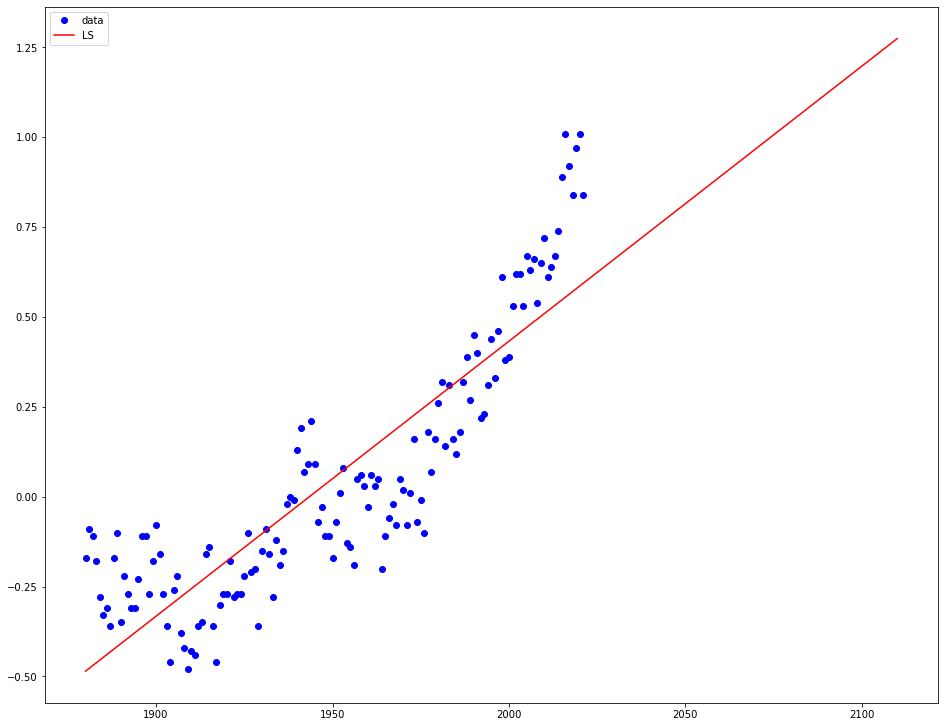

In [16]:
# plotting data first 

import csv
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

year = []
anomaly = []

with open('B6data.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        year.append(int(row[0]))
        anomaly.append(float(row[1]))

x = np.array(year)
y = np.array(anomaly)
#print(x)
#print(y)

# your least-squares estimation code here
X = np.stack((x, np.ones((len(anomaly)))), axis=1)
#print(X)
u = inv(np.transpose(X)@X)@np.transpose(X)@y 
#print(X)
print(u)


# plot data and least-squares fit
x0 = np.arange(year[0], 2120, step = 10)
y1 = u[0]*x0 + u[1]

#plt.figure(figsize=(1280/80,1024/80))
#plt.scatter(year, anomaly, s=100, facecolors='none', edgecolors='r')
#plt.show()

plt.figure(figsize=(1280/80,1024/80))
ax = plt.subplot(1,1,1)
plt.plot(x,y,'bo', label='data') # original data
plt.plot( x0, y1, 'r-', label='LS') # least-squares fit
ax.legend()
plt.show()